In [ ]:
#Kindly Download the Dataset before Running the Code, Click the below Link:
# https://universityofexeteruk-my.sharepoint.com/:f:/g/personal/as1998_exeter_ac_uk/Em4EWOutaY9KoJekxTL81mABH-U_nKKABcCkIvC8Kfr4UQ?e=0dflIk 

#To Download Postman:
# https://www.postman.com/downloads/

#Model Demo Video:
# https://universityofexeteruk-my.sharepoint.com/:v:/g/personal/as1998_exeter_ac_uk/EQMAeqsUWZBBpjUaRp_XpSYBPRGa-D_qEN4F-KtevdXgJA?nav=eyJyZWZlcnJhbEluZm8iOnsicmVmZXJyYWxBcHAiOiJPbmVEcml2ZUZvckJ1c2luZXNzIiwicmVmZXJyYWxBcHBQbGF0Zm9ybSI6IldlYiIsInJlZmVycmFsTW9kZSI6InZpZXciLCJyZWZlcnJhbFZpZXciOiJNeUZpbGVzTGlua0NvcHkifX0&e=iPwGOH

In [1]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, log_loss, roc_curve, auc, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [2]:
# Load the dataset
df = pd.read_csv('cicddos2019_dataset.csv')

# Inspect the first few rows of the DataFrame to understand its structure
print(df.head())
df_cleaned = df.drop(columns=['Unnamed: 0', 'Label'])

# Save the cleaned dataset
df_cleaned.to_csv('cleaned_dataset.csv', index=False)


   Unnamed: 0  Protocol  Flow Duration  Total Fwd Packets  \
0           0        17         216631                  6   
1           1        17              2                  2   
2           2        17             48                  2   
3           3        17         107319                  4   
4           4        17         107271                  4   

   Total Backward Packets  Fwd Packets Length Total  Bwd Packets Length Total  \
0                       0                    2088.0                       0.0   
1                       0                     802.0                       0.0   
2                       0                     766.0                       0.0   
3                       0                    1398.0                       0.0   
4                       0                    1438.0                       0.0   

   Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  ...  \
0                  393.0                  321.0                   

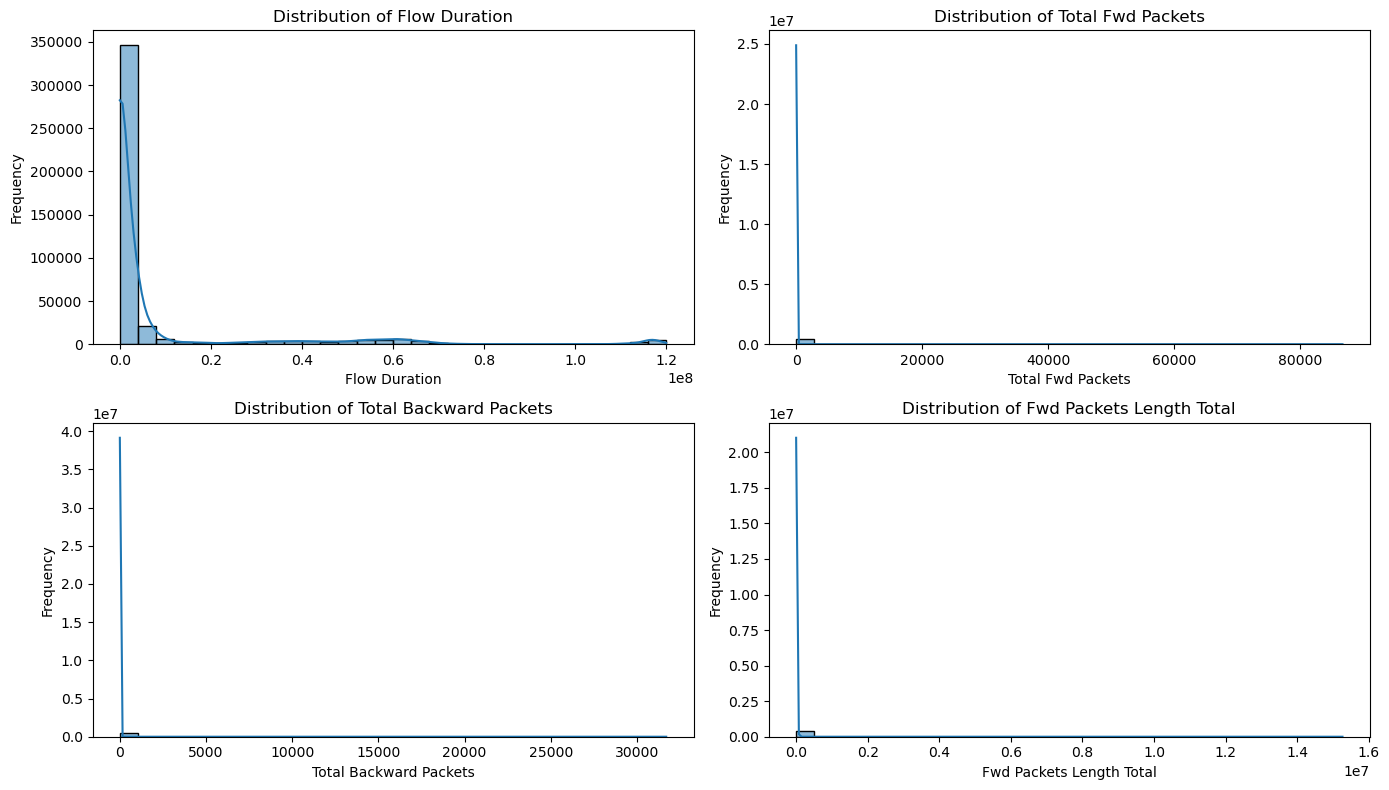

In [3]:
#Feature Distribution Analysis

# Plot distribution of a few key features
plt.figure(figsize=(14, 8))

features = ['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Fwd Packets Length Total']
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

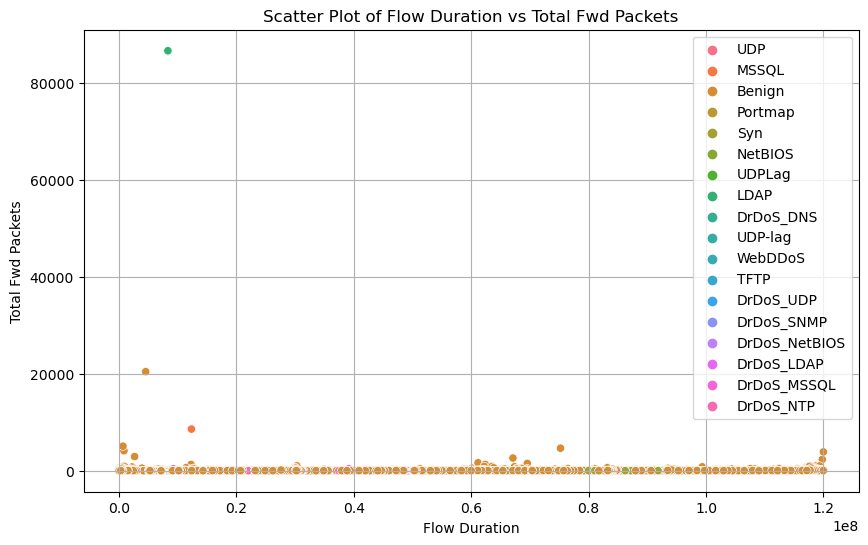

c:\Users\ASUS\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


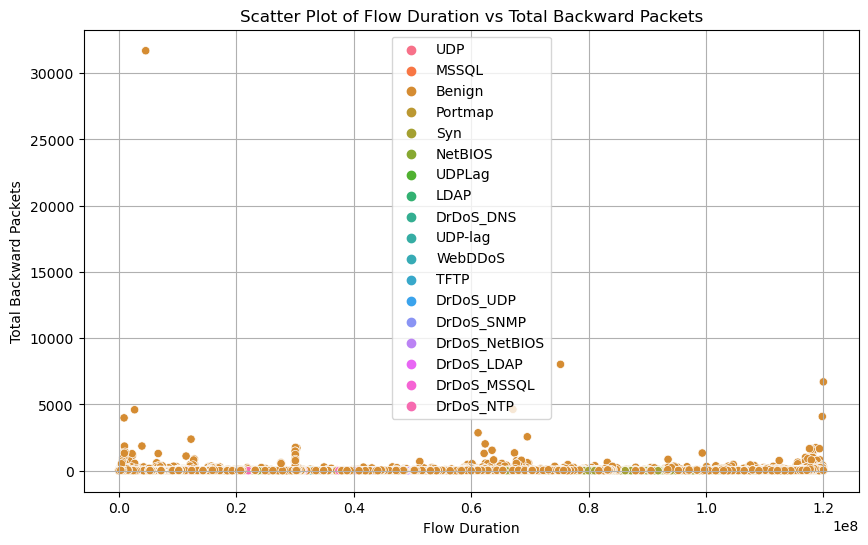

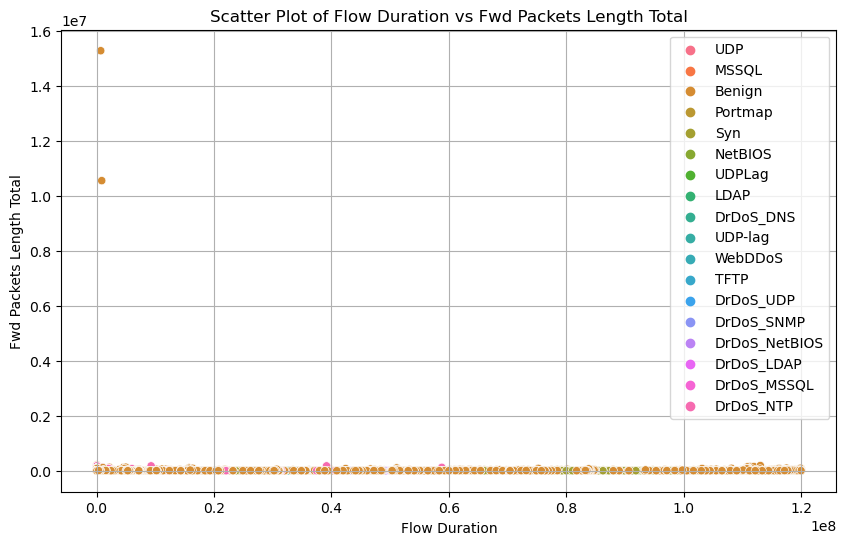

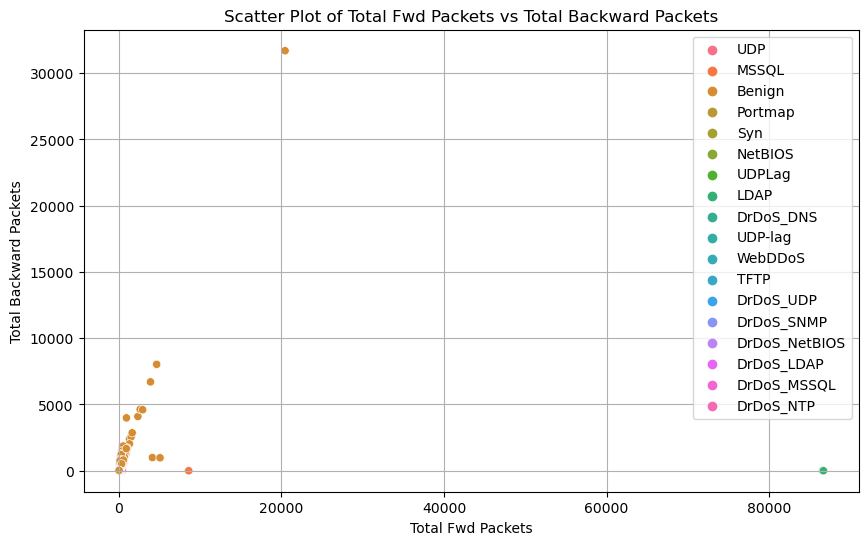

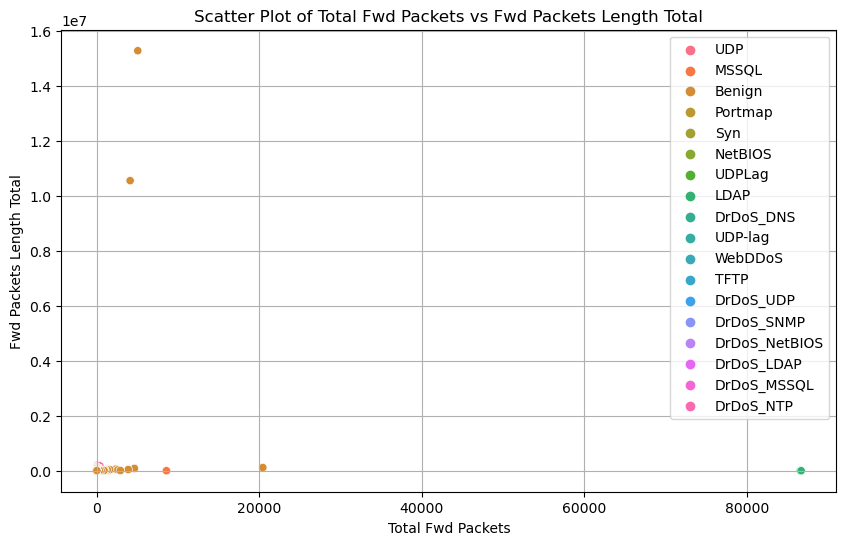

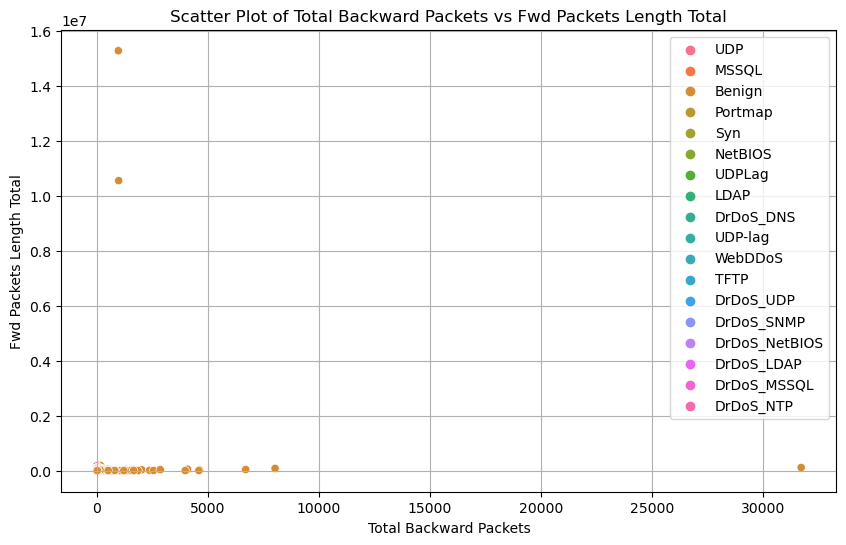

In [4]:
#Pair Plot

# Load your dataset
df = pd.read_csv('cicddos2019_dataset.csv')  # Replace with the correct path to your dataset

# Define features and label
features = ['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Fwd Packets Length Total']
label = 'Label'

# Scatter plot for each pair of features
for i in range(len(features)):
    for j in range(i + 1, len(features)):
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df, x=features[i], y=features[j], hue=label)
        plt.title(f'Scatter Plot of {features[i]} vs {features[j]}')
        plt.xlabel(features[i])
        plt.ylabel(features[j])
        plt.grid(True)
        plt.legend()
        plt.show()


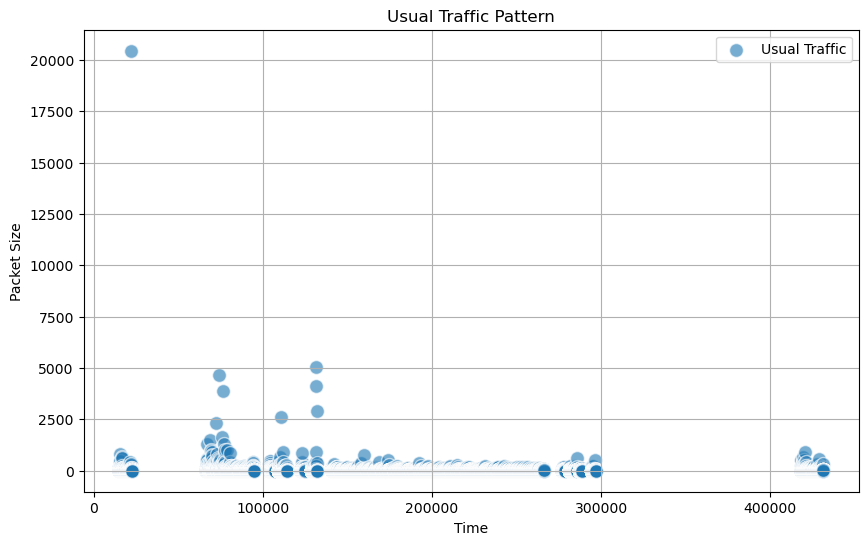

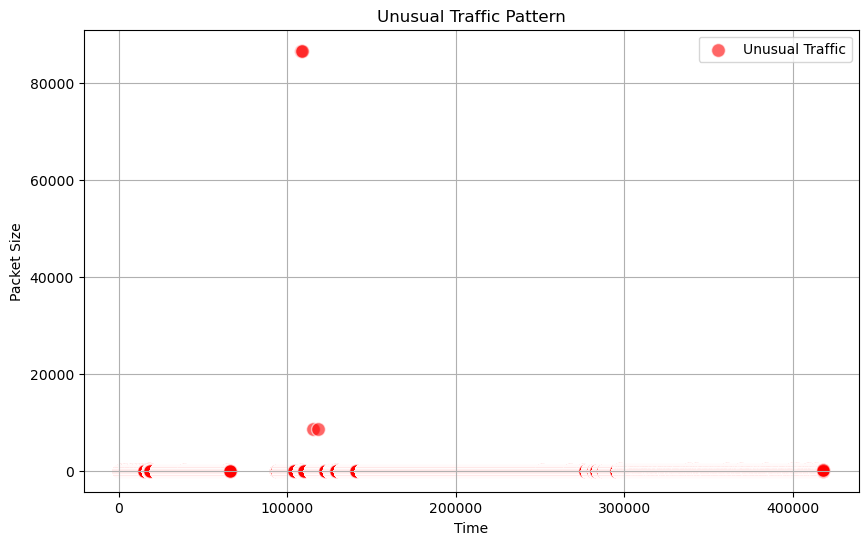

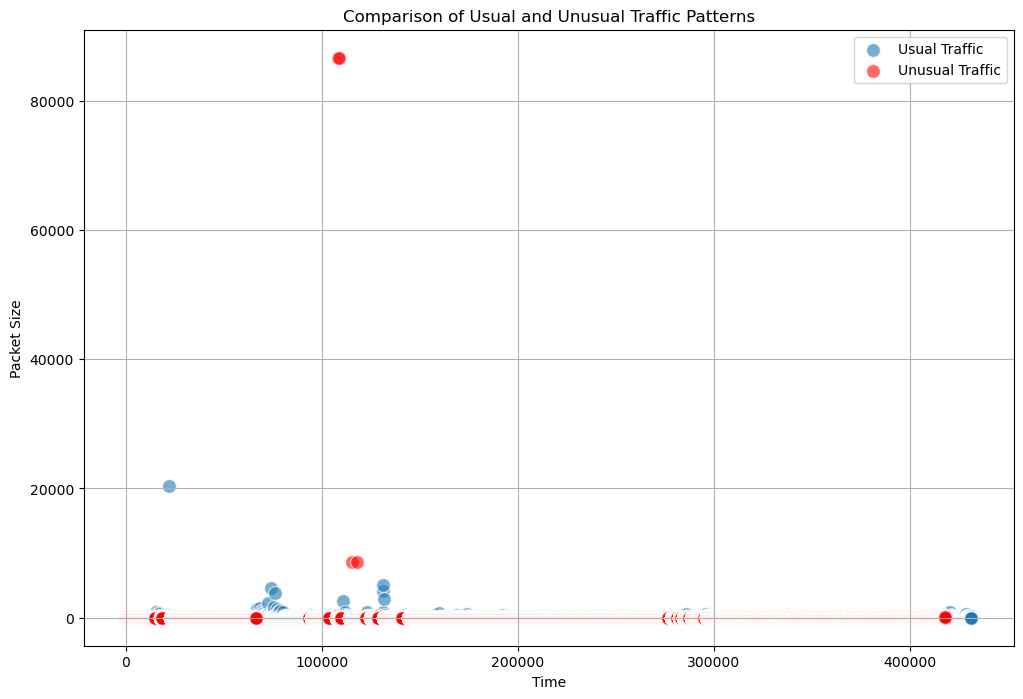

In [5]:
#Traffic Analysis:

# Load the cleaned dataset
df_cleaned = pd.read_csv('cleaned_dataset.csv')

# Separate usual and unusual traffic based on some criterion
# Here, we'll assume 'Class' column distinguishes usual (benign) from unusual (attack) traffic
usual_traffic = df_cleaned[df_cleaned['Class'] == 'Benign']
unusual_traffic = df_cleaned[df_cleaned['Class'] != 'Benign']

# Sample data
time_usual = usual_traffic.index
packet_size_usual = usual_traffic['Total Fwd Packets']

time_unusual = unusual_traffic.index
packet_size_unusual = unusual_traffic['Total Fwd Packets']

# Scatter plot for usual traffic pattern
plt.figure(figsize=(10, 6))
plt.scatter(time_usual, packet_size_usual, alpha=0.6, edgecolors='w', s=100, label='Usual Traffic')
plt.title('Usual Traffic Pattern')
plt.xlabel('Time')
plt.ylabel('Packet Size')
plt.grid(True)
plt.legend()
plt.show()

# Scatter plot for unusual traffic pattern
plt.figure(figsize=(10, 6))
plt.scatter(time_unusual, packet_size_unusual, alpha=0.6, edgecolors='w', s=100, color='r', label='Unusual Traffic')
plt.title('Unusual Traffic Pattern')
plt.xlabel('Time')
plt.ylabel('Packet Size')
plt.grid(True)
plt.legend()
plt.show()

# Comparison scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(time_usual, packet_size_usual, alpha=0.6, edgecolors='w', s=100, label='Usual Traffic')
plt.scatter(time_unusual, packet_size_unusual, alpha=0.6, edgecolors='w', s=100, color='r', label='Unusual Traffic')
plt.title('Comparison of Usual and Unusual Traffic Patterns')
plt.xlabel('Time')
plt.ylabel('Packet Size')
plt.grid(True)
plt.legend()
plt.show()


In [6]:
#RandomForestClassifier model

# Load the cleaned dataset
df_cleaned = pd.read_csv('cleaned_dataset.csv')

# Define features and target
X = df_cleaned.drop(columns=['Class'])
y = df_cleaned['Class']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Save the model and scaler
joblib.dump(model, 'final_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Save the model to a .txt file
with open('final_model.txt', 'w') as file:
    file.write(str(model))

# Save the feature names
with open('features.txt', 'w') as f:
    for feature in X.columns:
        f.write(f"{feature}\n")


In [7]:
#Hyperparamter Tuning

# Load your dataset
df = pd.read_csv('cleaned_dataset.csv')  # Adjust the path to your dataset

# Define features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for hyperparameter tuning (reduced grid)
param_grid = {
    'n_estimators': [50, 100],  # Reduced number of estimators
    'max_depth': [None, 10, 20],  # Reduced depth options
    'min_samples_split': [2, 5],  # Reduced sample split options
    'min_samples_leaf': [1, 2]  # Reduced leaf options
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with 3-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Save the best model
best_model = grid_search.best_estimator_
joblib.dump(best_model, 'best_model.pkl')

print(f"Best Hyperparameters: {grid_search.best_params_}")


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


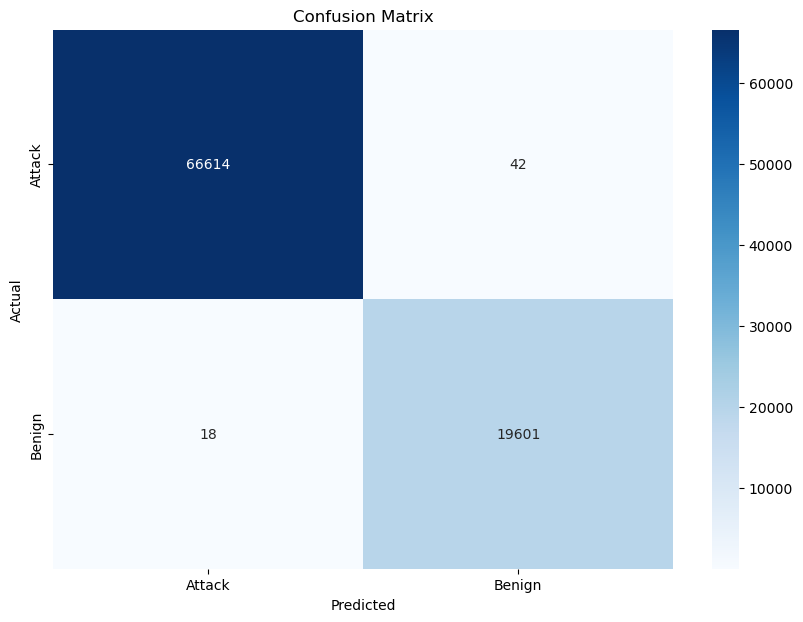

              precision    recall  f1-score   support

      Attack       1.00      1.00      1.00     66656
      Benign       1.00      1.00      1.00     19619

    accuracy                           1.00     86275
   macro avg       1.00      1.00      1.00     86275
weighted avg       1.00      1.00      1.00     86275



In [8]:
#Confusion Matrix

# Load the model and scaler
model = joblib.load('best_model.pkl')
scaler = joblib.load('scaler.pkl')

# Load the cleaned dataset
df_cleaned = pd.read_csv('cleaned_dataset.csv')

# Define features and target
X = df_cleaned.drop(columns=['Class'])
y = df_cleaned['Class']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using the previously fitted scaler
X_test_scaled = scaler.transform(X_test)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Transform y_test to binary values
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)

# Transform y_pred to binary values using the same label encoder
y_pred_binary = label_encoder.transform(y_pred)

# Generate confusion matrix
cm = confusion_matrix(y_test_binary, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
report = classification_report(y_test_binary, y_pred_binary, target_names=label_encoder.classes_)
print(report)

Index(['Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Fwd Packets Length Total',
       'Bwd Packets Length Total', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Fla

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

      Attack       1.00      1.00      1.00     66656
      Benign       0.99      0.99      0.99     19619

    accuracy                           0.99     86275
   macro avg       0.99      0.99      0.99     86275
weighted avg       0.99      0.99      0.99     86275



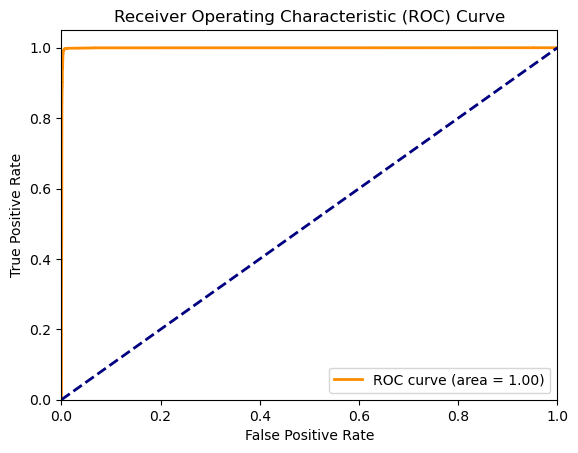

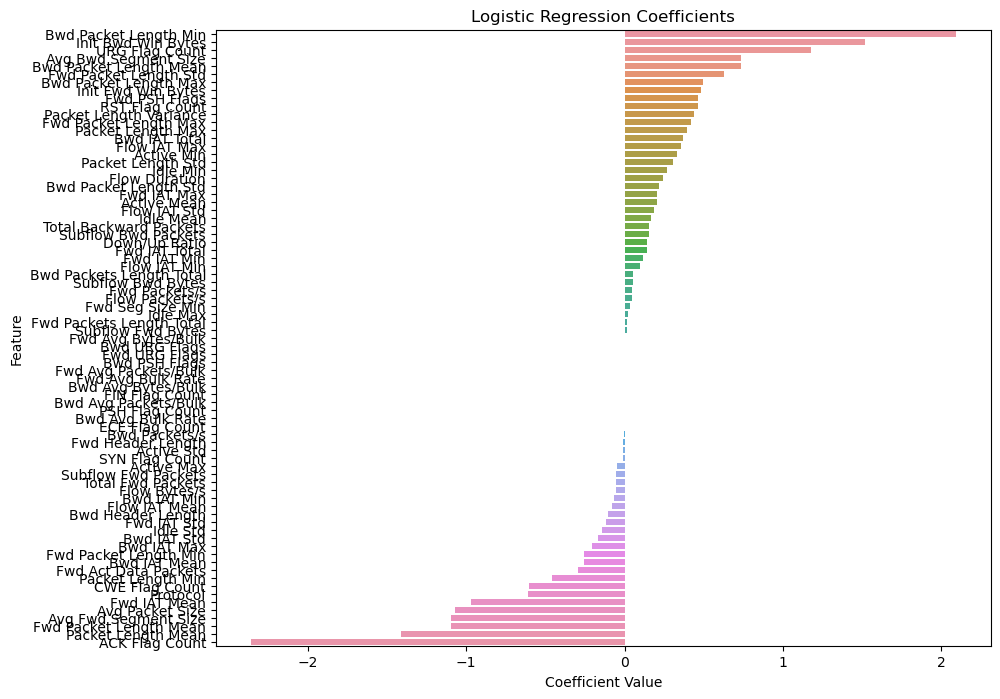

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc

# Load your cleaned dataset
df = pd.read_csv('cleaned_dataset.csv')

# Print the column names to verify the correct name of the target column
print(df.columns)

# Adjust the target column name based on your dataset
target_column = 'Class'  # Change this if 'Label' is not the correct name
feature_columns = [col for col in df.columns if col not in [target_column, 'Unnamed: 0']]

# Splitting features and target variable
X = df[feature_columns]
y = df[target_column]

# Encoding the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the logistic regression model
model = LogisticRegression(solver='saga', max_iter=2000, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Probability estimates for the positive class (assuming binary classification)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Model Coefficients
coefficients = pd.DataFrame(model.coef_.T, index=X.columns, columns=['Coefficient'])
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x=coefficients['Coefficient'], y=coefficients.index)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [ ]:
#Evaluation of Cross-Validation Loss score

# Load the cleaned dataset
df_cleaned = pd.read_csv('cleaned_dataset.csv')

# Define features and target
X = df_cleaned.drop(columns=['Class'])
y = df_cleaned['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with a scaler and a RandomForestClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Perform cross-validation on the training data
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_log_loss')  # 5-fold cross-validation with negative log loss

# Calculate and print the mean negative log loss
mean_cv_score = -cv_scores.mean()  # Convert to positive log loss

print(f"Cross-validation log loss scores: {-cv_scores}")
print(f"Mean cross-validation log loss: {mean_cv_score}")


Cross-validation log loss scores: [0.00276741 0.0020574  0.00242954 0.00362074 0.00275265]
Mean cross-validation log loss: 0.0027255484020286434


C:\Users\ASUS\AppData\Local\Temp\ipykernel_25444\4125726936.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_sampled = df_sampled.corr()


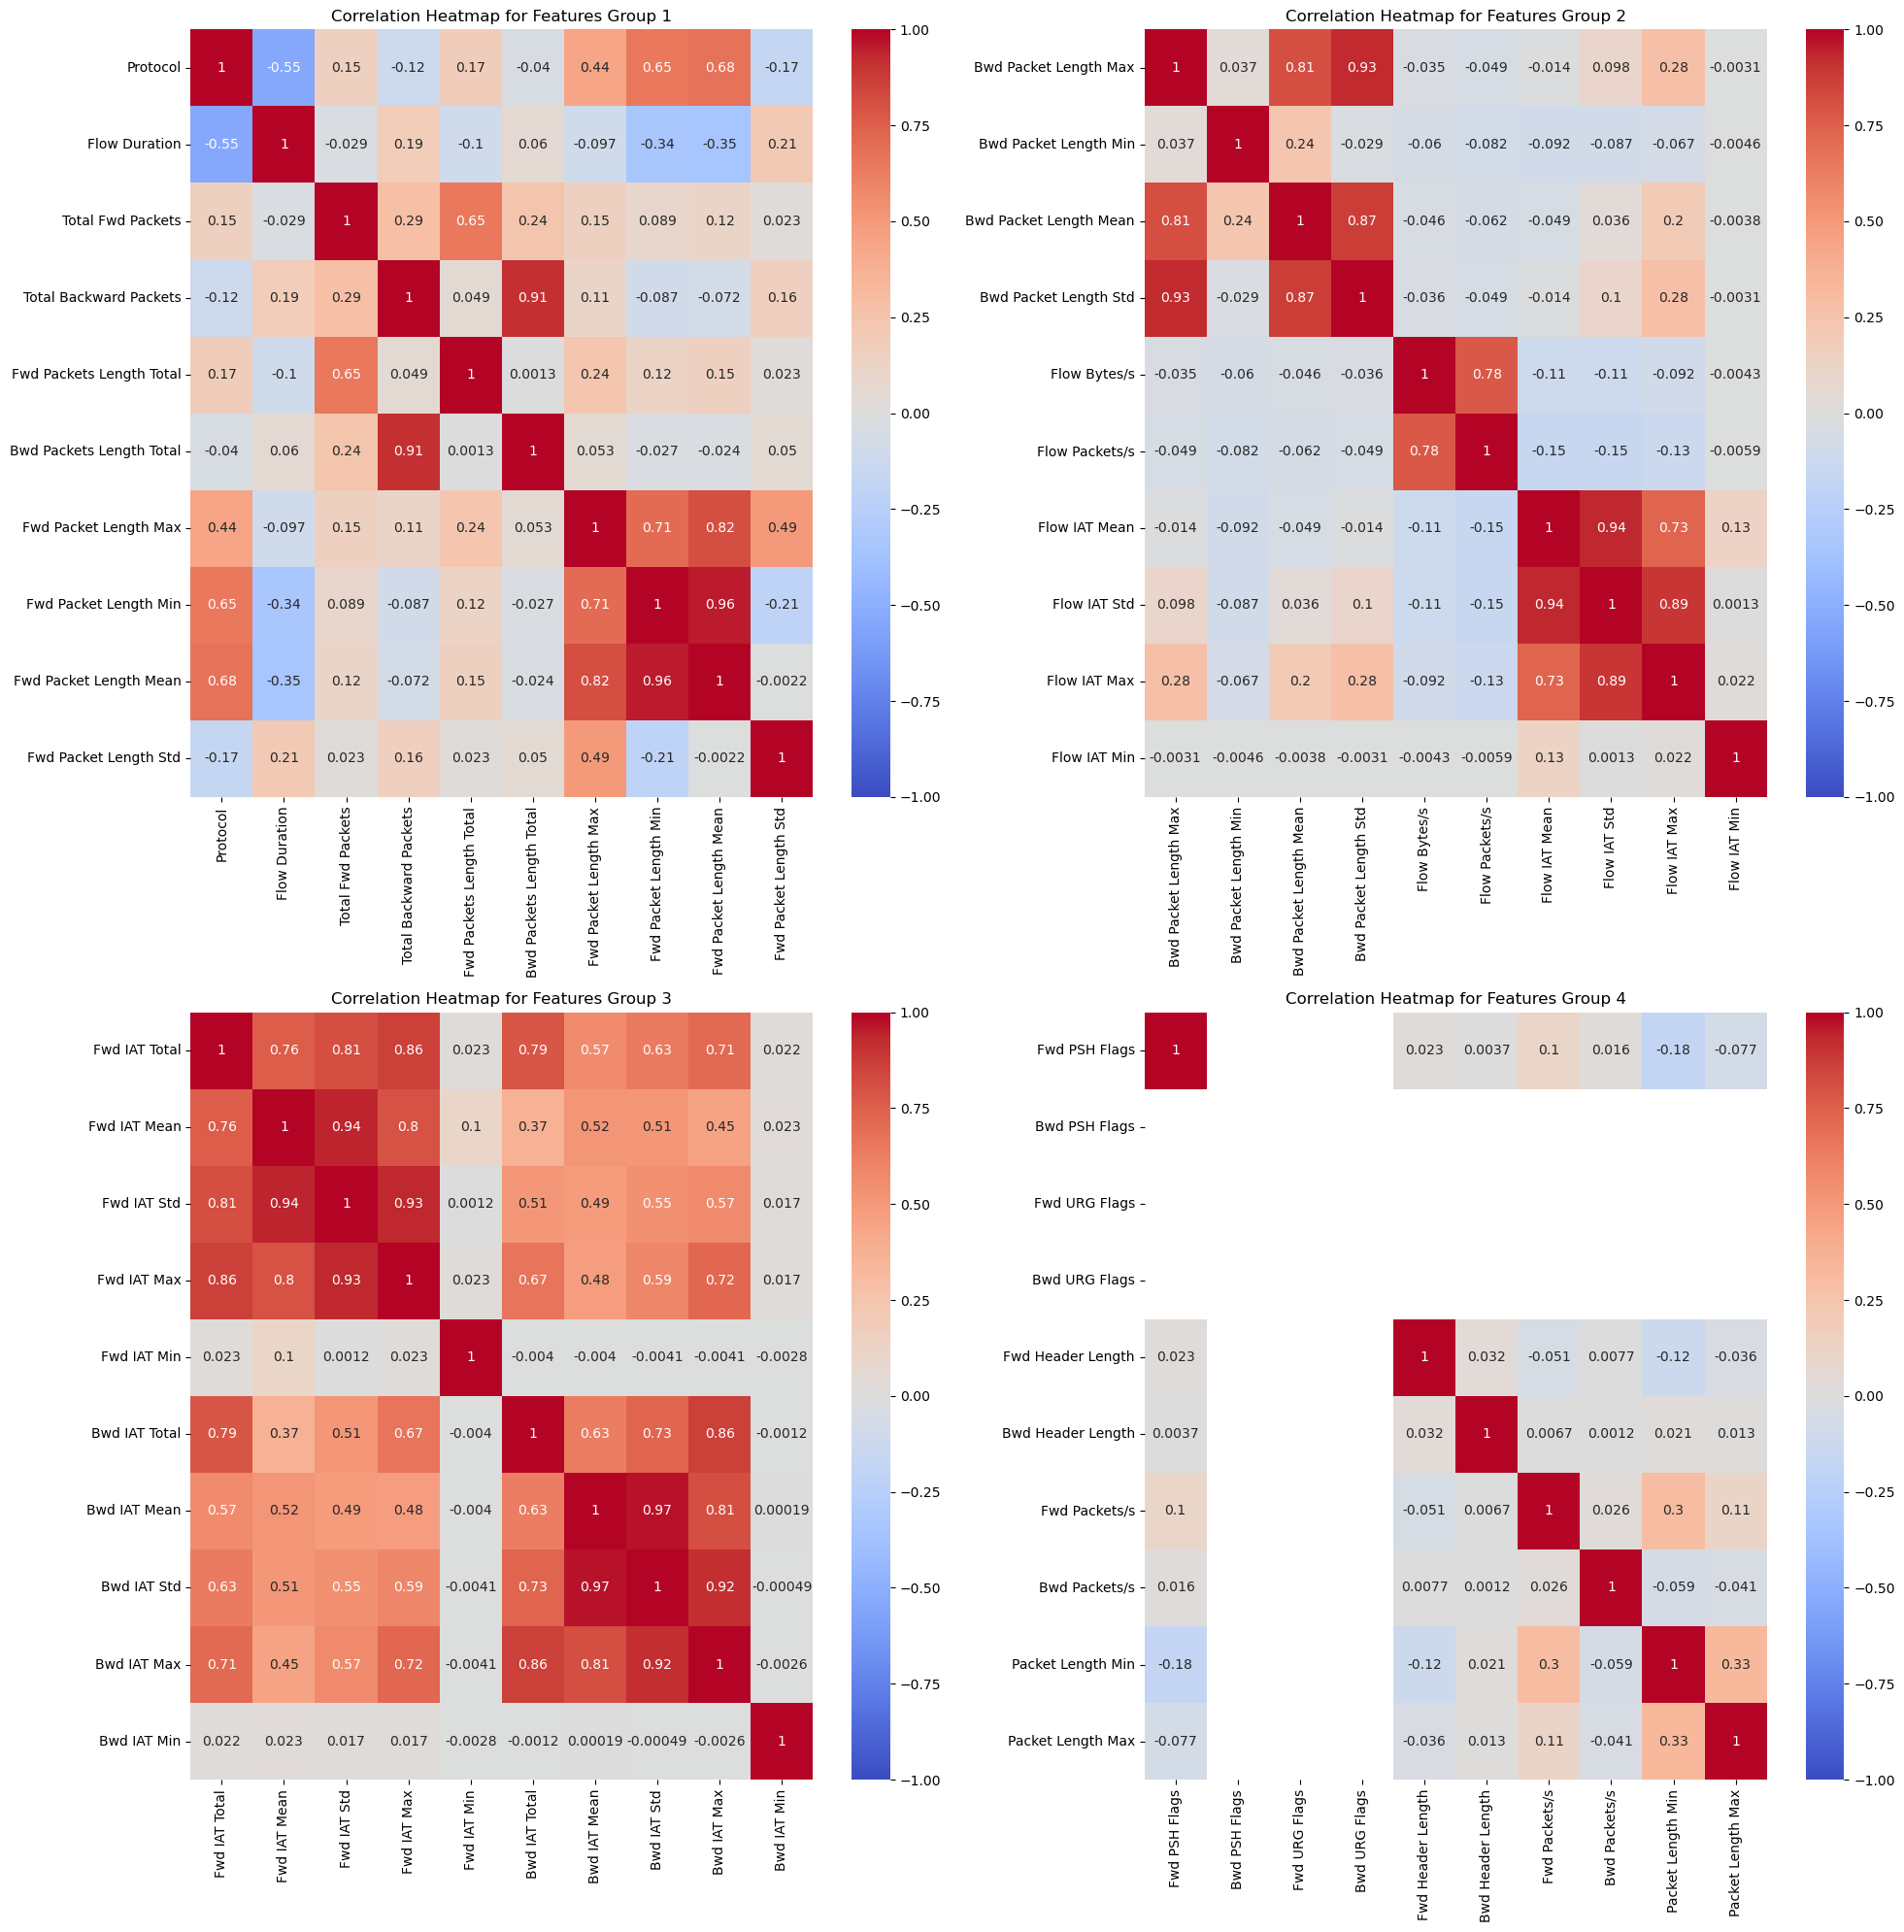

In [ ]:
#Correlation Heatmap

# Randomly sample 50% of the data
df_sampled = df.sample(frac=0.5, random_state=42)

# Compute the correlation matrix for the sampled data
corr_matrix_sampled = df_sampled.corr()

# Split the correlation matrix into smaller parts
num_features = 10  # Number of features in each group
feature_groups = [corr_matrix_sampled.columns[i:i + num_features] for i in range(0, len(corr_matrix_sampled.columns), num_features)]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Generate heatmaps for each group of features
for idx, group in enumerate(feature_groups[:4]):  # Limiting to first 4 groups for a 2x2 grid
    sns.heatmap(corr_matrix_sampled.loc[group, group], annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[idx])
    axes[idx].set_title(f'Correlation Heatmap for Features Group {idx+1}')

plt.tight_layout()
plt.show()

In [ ]:
# Load the best model
best_model = joblib.load('best_model.pkl')

# Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)

# Generate and print the classification report
print("Classification Report after Hyperparameter Tuning:")
print(classification_report(y_test, y_pred))

Classification Report after Hyperparameter Tuning:
              precision    recall  f1-score   support

      Attack       1.00      1.00      1.00     66656
      Benign       1.00      1.00      1.00     19619

    accuracy                           1.00     86275
   macro avg       1.00      1.00      1.00     86275
weighted avg       1.00      1.00      1.00     86275

